# Phase 2: Data Cleaning and Exploratory Data Analysis

Goal: Prepare clean, usable data by handling missing values, detecting outliers, performing EDA, and identifying potential data leakage risks.



In [2]:

pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('../data/raw/customers.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'] ,errors='coerce')
df['TotalCharges'].isnull().sum()


np.int64(11)

In [6]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())


In [7]:
print(df['TotalCharges'].isnull().sum())
print(df['TotalCharges'].dtype)

0
float64


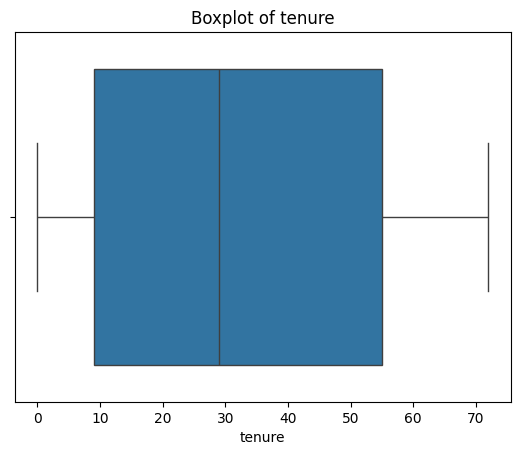

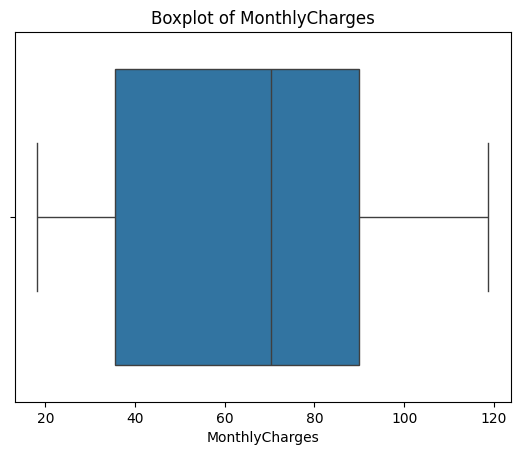

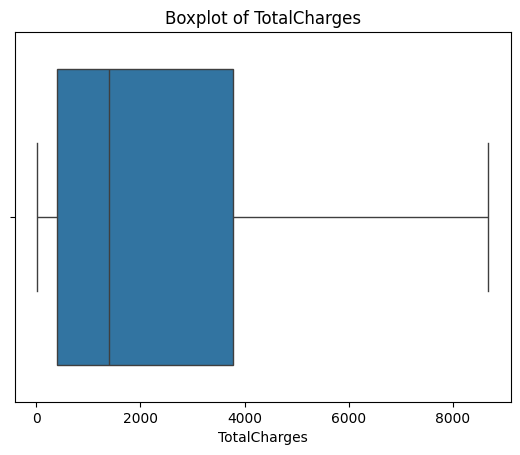

In [8]:
for col in ["tenure", "MonthlyCharges", "TotalCharges"]:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

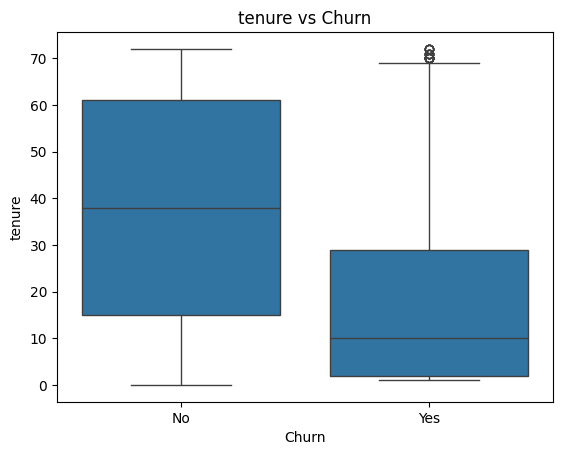

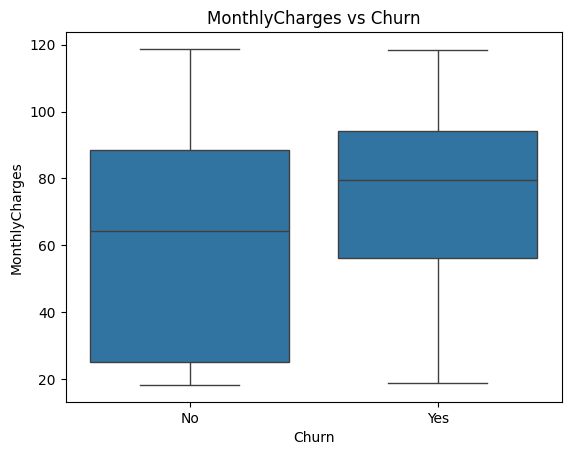

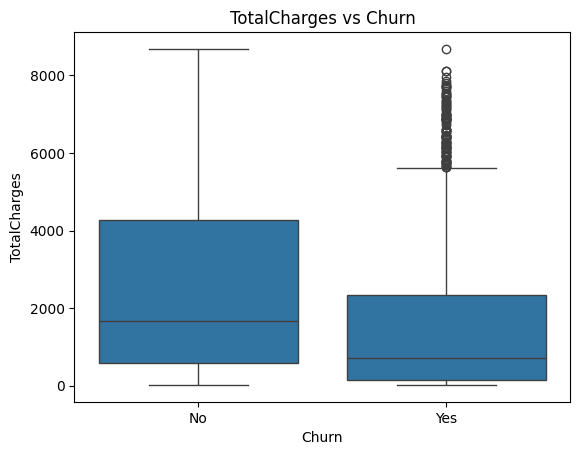

In [10]:
for col in ["tenure", "MonthlyCharges", "TotalCharges"]:
    plt.figure()
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f"{col} vs Churn")
    plt.show()


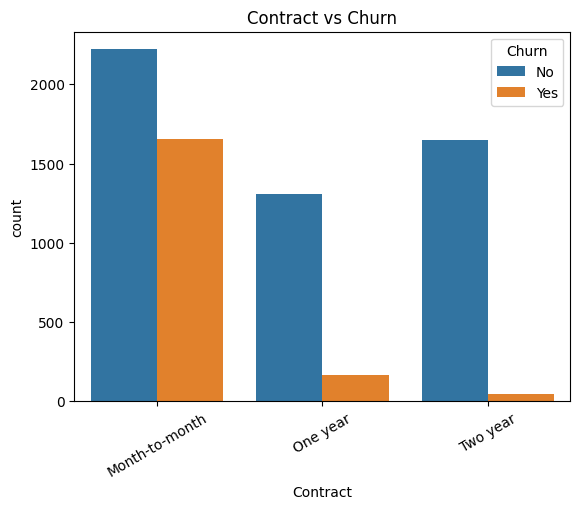

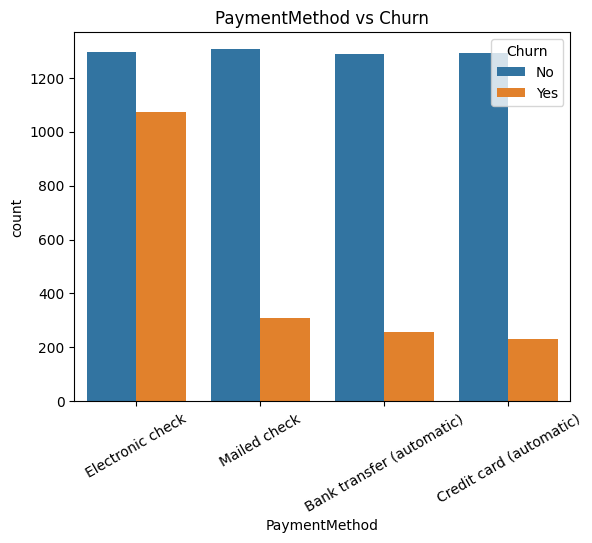

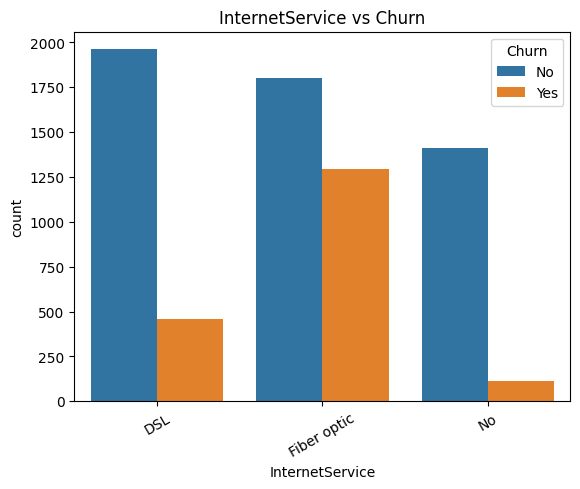

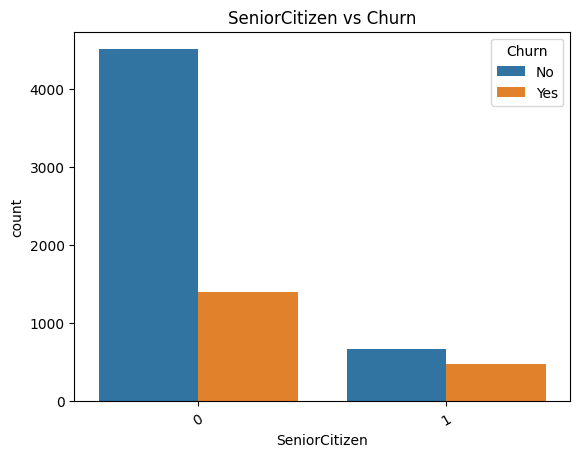

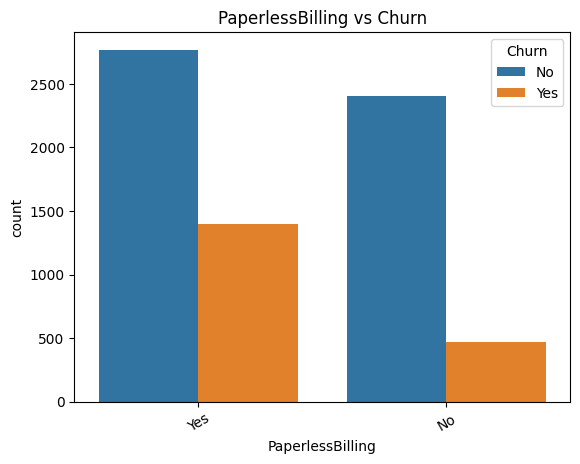

In [11]:
import matplotlib.pyplot as plt

cat_cols = [
    'Contract', 'PaymentMethod', 'InternetService',
    'SeniorCitizen', 'PaperlessBilling'
]

for col in cat_cols:
    plt.figure()
    sns.countplot(x=col, hue='Churn', data=df)
    plt.xticks(rotation=30)
    plt.title(f"{col} vs Churn")
    plt.show()


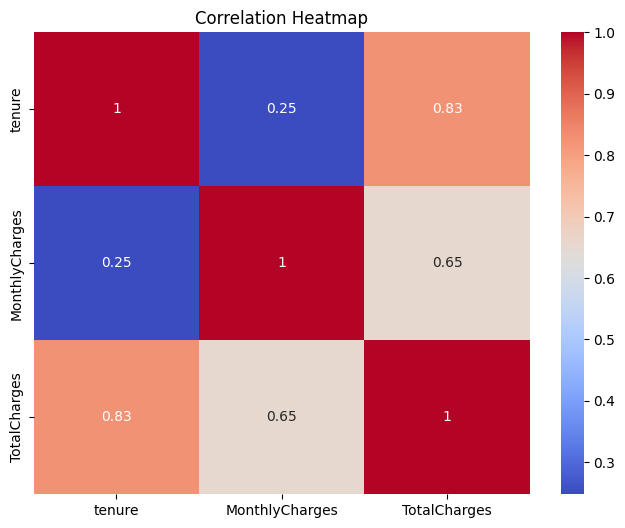

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


TESTING:

In [ ]:
df.isnull().sum().sum()


np.int64(0)

In [ ]:
df.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
df.duplicated().sum()


np.int64(0)

<Axes: xlabel='MonthlyCharges'>

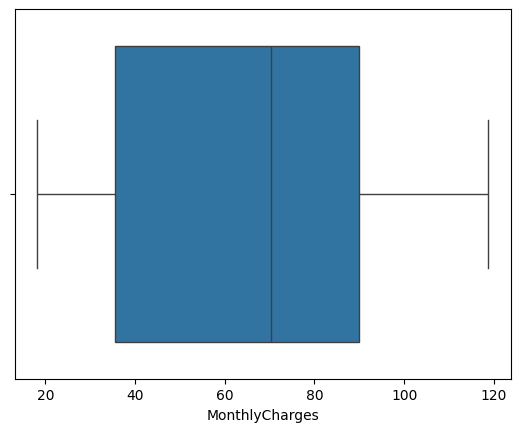

In [ ]:
sns.boxplot(x=df['MonthlyCharges'])


### Key Observations
- Dataset contains mixed numerical and categorical features
- Churn is a binary target variable
- Customers with low tenure and month-to-month contracts churn more
- Electronic check users show higher churn
- Numerical features show moderate correlation
- No direct data leakage detected, but TotalCharges requires caution
